In [1]:
import pandas as pd
import numpy as np

In [3]:
#1. Data merge

df_a=pd.DataFrame({'key':['a', 'b', 'c', 'd', 'e'],
             'num_a':[1, 2, 3, 4, 5]})
df_b=pd.DataFrame({'key':['a', 'b', 'd', 'f', 'g'],
             'num_b':[11, 15, 35, 45, 55]})
df_c=pd.DataFrame({'key':['f', 'g', 'h', 'i', 'j'],
             'num_a':[6, 7, 8, 9, 0]})

In [4]:
pd.concat([df_a, df_b])

,key,num_a,num_b
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
0,a,NaN,11.0
1,b,NaN,15.0
2,d,NaN,35.0
3,f,NaN,45.0
4,g,NaN,55.0


In [5]:
pd.concat([df_a, df_c]) #인덱스는 새로 지정되지 않는다 > reset 필요

,key,num_a
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5
0,f,6
1,g,7
2,h,8
3,i,9
4,j,0


In [6]:
pd.concat([df_a, df_b, df_c])

,key,num_a,num_b
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
0,a,NaN,11.0
1,b,NaN,15.0
2,d,NaN,35.0
3,f,NaN,45.0
4,g,NaN,55.0


In [7]:
pd.concat([df_a, df_b], axis=1) #동일한 컬럼이 있어도 단순히 붙이기만 함

,key,num_a,key,num_b
0,a,1,a,11
1,b,2,b,15
2,c,3,d,35
3,d,4,f,45
4,e,5,g,55


In [8]:
df_a.merge(df_b) #inner join을 기반으로 해 공통값 출력

,key,num_a,num_b
0,a,1,11
1,b,2,15
2,d,4,35


In [9]:
df_a.merge(df_b, how='outer')

,key,num_a,num_b
0,a,1.0,11.0
1,b,2.0,15.0
2,c,3.0,NaN
3,d,4.0,35.0
4,e,5.0,NaN
5,f,NaN,45.0
6,g,NaN,55.0


In [10]:
df_a.merge(df_b, how='left')

,key,num_a,num_b
0,a,1,11.0
1,b,2,15.0
2,c,3,NaN
3,d,4,35.0
4,e,5,NaN


In [11]:
df_a.merge(df_b, how='right')

,key,num_a,num_b
0,a,1.0,11
1,b,2.0,15
2,d,4.0,35
3,f,NaN,45
4,g,NaN,55


In [12]:
df_a.merge(df_b, on='key',how='right')
#동일한 컬럼이 여러개 있는 경우, 특정 컬럼만 지정하는 경우 사용할 수 있다

,key,num_a,num_b
0,a,1.0,11
1,b,2.0,15
2,d,4.0,35
3,f,NaN,45
4,g,NaN,55


In [15]:
df_a=pd.DataFrame({'key':['a', 'b', 'c', 'd', 'e'], 'id':['q', 'w', 'e', 'r', 't'], 
             'num_a':[1, 2, 3, 4, 5]})
df_b=pd.DataFrame({'key':['a', 'b', 'd', 'f', 'g'],'id':['r', 't', 'z', 'x', 'y'],
             'num_b':[11, 15, 35, 45, 55]})

In [17]:
df_a.merge(df_b, on='key')

,key,id_x,num_a,id_y,num_b
0,a,q,1,r,11
1,b,w,2,t,15
2,d,r,4,z,35


In [18]:
df_a.merge(df_b, on='id')

,key_x,id,num_a,key_y,num_b
0,d,r,4,a,11
1,e,t,5,b,15


In [19]:
df_a.merge(df_b, on='id', how='left')

,key_x,id,num_a,key_y,num_b
0,a,q,1,NaN,NaN
1,b,w,2,NaN,NaN
2,c,e,3,NaN,NaN
3,d,r,4,a,11.0
4,e,t,5,b,15.0


In [20]:
df_a=pd.DataFrame({'key':['a', 'b', 'c', 'd', 'e'], 
             'num_a':[1, 2, 3, 4, 5]})
df_b=pd.DataFrame({'id':['a', 'b', 'd', 'f', 'g'],
             'num_b':[11, 15, 35, 45, 55]})

In [21]:
df_a.merge(df_b, left_on='key', right_on='id', how='outer')

,key,num_a,id,num_b
0,a,1.0,a,11.0
1,b,2.0,b,15.0
2,c,3.0,NaN,NaN
3,d,4.0,d,35.0
4,e,5.0,NaN,NaN
5,NaN,NaN,f,45.0
6,NaN,NaN,g,55.0


In [26]:
df_a=pd.DataFrame({'key':['a', 'b', 'c', 'd', 'e'], 
             'num_a':[1, 2, 3, 4, 5]})
df_b=pd.DataFrame({'key':['a', 'b', 'd', 'f', 'g'],
             'num_b':[11, 15, 35, 45, 55]})

In [27]:
df_a.join(df_b, lsuffix='_a', rsuffix='_b')

,key_a,num_a,key_b,num_b
0,a,1,a,11
1,b,2,b,15
2,c,3,d,35
3,d,4,f,45
4,e,5,g,55


In [29]:
#join의 경우 key 값을 기준으로 병합하려면 key를 인덱스로 지정해야 한다

df_a=df_a.set_index('key')
df_b=df_b.set_index('key')

In [30]:
df_a.join(df_b) #left join이 디폴트이다

,num_a,num_b
key,,
a,1,11.0
b,2,15.0
c,3,NaN
d,4,35.0
e,5,NaN


In [31]:
df_a.join(df_b, how='outer')

,num_a,num_b
key,,
a,1.0,11.0
b,2.0,15.0
c,3.0,NaN
d,4.0,35.0
e,5.0,NaN
f,NaN,45.0
g,NaN,55.0


In [32]:
df_a.join(df_b, how='inner')

,num_a,num_b
key,,
a,1,11
b,2,15
d,4,35


In [33]:
salary_1=pd.read_csv('/aiffel/data/salary_1.csv')
salary_2=pd.read_csv('/aiffel/data/salary_2.csv')

In [34]:
salary_1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0


In [35]:
salary_2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,29,Female,1,Human Resources Coordinator,2,45000,China,Chinese,0
1,23,Male,0,Sales Associate,1,25000,USA,Asian,0
2,32,Female,2,Software Developer,7,90000,USA,African American,0
3,44,Male,1,Operations Manager,18,170000,USA,Hispanic,0
4,26,Female,1,Marketing Coordinator,2,40000,Canada,Asian,0


In [36]:
salary_df=pd.concat([salary_1, salary_2])

In [37]:
#기존에 해당하는 인덱스를 가져오기 때문에 끝나는 지점이 다르다
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
2680,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
2681,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
2682,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
2683,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [38]:
salary_df.loc[0]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
0,29.0,Female,1,Human Resources Coordinator,2.0,45000,China,Chinese,0


In [41]:
#인덱스 재설정
salary_df.reset_index(drop=True, inplace=True)
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [44]:
cpi=pd.read_csv('/aiffel/data/cpi.csv')
cpi.head()

#국가들의 표기가 다름. 맞춰주어야 함

,Country,Reference,Last,Previous,Units,Frequency
0,United States,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
1,China,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly
2,Germany,Sep-23,117.9,117.5,"Index 2020=100, CDASA",Monthly
3,France,Sep-23,118.52,118.2,"Index 2015=100, SA",Monthly
4,United Kingdom,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly


In [46]:
salary_df['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [47]:
cpi['Country'].unique()

array(['United States', 'China', 'Germany', 'France', 'United Kingdom',
       'Brazil', 'Italy', 'Russian Federation', 'Canada', 'Australia',
       'Spain', 'South Korea', 'Mexico', 'Indonesia', 'Netherlands'],
      dtype=object)

In [50]:
cpi['Country']=cpi['Country'].replace({'United States':'USA', 'United Kingdom':'UK'})

In [52]:
salary_df=salary_df.merge(cpi, on='Country', how='left')

In [53]:
salary_df.drop(['Reference', 'Previous', 'Units', 'Frequency'], axis=1, inplace=True)

In [54]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Last
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [55]:
#컬럼 이름 변경
salary_df=salary_df.rename({'Last':'CPI'}, axis=1)

In [ ]:
#2. 개요, 결측치&이상치(Missing Value & Outlier), 집계 및 그룹화(Aggregation and Group by), 피벗테이블(Pivot)

In [56]:
#2.1. 결측치 제거
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6684 entries, 0 to 6683
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6680 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
 9   CPI                  6684 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 574.4+ KB


In [58]:
salary_df['CPI']=pd.to_numeric(salary_df['CPI'])

In [59]:
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6680.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.00000
mean,33.611527,1.622382,8.084007,115307.175194,0.143477,167.12953
std,7.595506,0.880474,6.097824,52806.810881,0.350585,73.22657
min,21.000000,0.000000,-1.000000,350.000000,0.000000,100.00000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.00000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.30000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.70000
max,62.000000,3.000000,82.000000,250000.000000,1.000000,307.48000


In [60]:
salary_df.isna().sum()

Age                    4
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
CPI                    0
dtype: int64

In [61]:
salary_df[salary_df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
548,NaN,Male,1,Data Analyst,3.0,130000,Canada,White,0,158.70
2135,NaN,Female,3,Project Engineer,16.0,190000,USA,African American,1,307.48
2749,NaN,Female,1,Software Engineer,1.0,50000,Australia,White,0,135.30
3826,NaN,Female,2,Marketing Coordinator,8.0,85000,UK,Asian,0,132.00


In [62]:
salary_df=salary_df.dropna()

In [63]:
salary_df[salary_df['Years of Experience']==-1]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
102,49.0,Female,2,HR Manager,-1.0,150000,Australia,White,1,135.3
256,35.0,Male,1,Project Coordinator,-1.0,95000,UK,Asian,1,132.0
359,34.0,Male,1,Operations Coordinator,-1.0,90000,China,Chinese,1,100.0


In [65]:
salary_df=salary_df[salary_df['Years of Experience']!=-1]

In [66]:
salary_df['Years of Experience'].sort_values()

4931     0.0
5104     0.0
5115     0.0
5119     0.0
5143     0.0
        ... 
2396    33.0
2391    33.0
2490    34.0
2415    34.0
564     82.0
Name: Years of Experience, Length: 6677, dtype: float64

In [67]:
salary_df[salary_df['Years of Experience']==82]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3


In [69]:
salary_df[salary_df['Years of Experience'] > salary_df['Age'] - 18]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3
2373,25.0,Male,3,Software Engineer Manager,12.0,169159,China,Chinese,0,100.0
2448,25.0,Male,3,Software Engineer Manager,12.0,169159,China,White,0,100.0


In [70]:
salary_df=salary_df[~(salary_df['Years of Experience'] > salary_df['Age'] - 18)]

In [71]:
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000
mean,33.612826,1.622116,8.076491,115294.402307,0.143093,167.164774
std,7.594369,0.880460,6.029750,52819.326323,0.350193,73.241730
min,21.000000,0.000000,0.000000,350.000000,0.000000,100.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.300000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.700000
max,62.000000,3.000000,34.000000,250000.000000,1.000000,307.480000


In [72]:
salary_df[salary_df['Years of Experience']==0]
#나이를 고려하여 근무한지 1년이 되지 않는 것이 가능하다고 판단

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
18,25.0,Female,1,Data Entry Clerk,0.0,35000,UK,Asian,0,132.00
49,25.0,Male,1,Help Desk Analyst,0.0,35000,USA,Asian,0,307.48
82,25.0,Male,1,Sales Representative,0.0,30000,Australia,Asian,0,135.30
2416,24.0,Male,2,Back end Developer,0.0,55538,USA,Asian,0,307.48
2430,22.0,Female,0,Back end Developer,0.0,51832,UK,White,0,132.00
...,...,...,...,...,...,...,...,...,...,...
6179,24.0,Female,0,Receptionist,0.0,25000,China,White,0,100.00
6193,24.0,Female,0,Receptionist,0.0,25000,Australia,Australian,0,135.30
6207,24.0,Female,0,Receptionist,0.0,25000,Australia,White,0,135.30
6221,24.0,Female,0,Receptionist,0.0,25000,UK,Welsh,0,132.00


In [73]:
#2.2. groupby

salary_df.head()
#보통 카테고리 별로 연산을 할 때 카테고리를 기준으로 묶는다

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [75]:
salary_df.groupby('Gender').mean()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
Gender,,,,,,
Female,32.622008,1.600066,7.417221,107873.854056,0.127992,167.485166
Male,34.425805,1.640207,8.617430,121383.057283,0.155483,166.901888


In [76]:
salary_df.groupby('Gender').max()

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
Gender,,,,,,,,,
Female,60.0,3,Web Developer,34.0,220000,USA,White,1,307.48
Male,62.0,3,Web Developer,32.0,250000,USA,White,1,307.48


In [77]:
salary_df.groupby('Gender')['Salary'].mean()

Gender
Female    107873.854056
Male      121383.057283
Name: Salary, dtype: float64

In [78]:
salary_df.groupby('Gender')['Salary'].sum()

Gender
Female    324484553
Male      444990288
Name: Salary, dtype: int64

In [79]:
salary_df.groupby(['Gender', 'Country'])['Salary'].mean()
#시리즈 형태, gender, country는 인덱스이다

Gender  Country  
Female  Australia    107936.054010
        Canada       106884.711340
        China        111291.211506
        UK           108495.273026
        USA          104854.691558
Male    Australia    120896.764216
        Canada       123973.921516
        China        120135.522148
        UK           122244.048476
        USA          119683.120433
Name: Salary, dtype: float64

In [81]:
salary_df.groupby('Gender')['Salary'].agg(['sum', 'mean'])

,sum,mean
Gender,,
Female,324484553,107873.854056
Male,444990288,121383.057283


In [82]:
salary_df.groupby(['Gender', 'Country'])['Salary'].mean().reset_index()
#데이터프레임으로 변경

,Gender,Country,Salary
0,Female,Australia,107936.054010
1,Female,Canada,106884.711340
2,Female,China,111291.211506
3,Female,UK,108495.273026
4,Female,USA,104854.691558
5,Male,Australia,120896.764216
6,Male,Canada,123973.921516
7,Male,China,120135.522148
8,Male,UK,122244.048476
9,Male,USA,119683.120433


In [83]:
#2.3. pivot table

pd.pivot_table(salary_df, index='Gender', columns='Country', values='Salary')

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [84]:
pd.pivot_table(salary_df, index='Gender', columns='Country', values='Salary', aggfunc='mean')

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [85]:
pd.pivot_table(salary_df, index='Gender', columns='Country', values='Salary', aggfunc=np.mean)

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [86]:
pd.pivot_table(salary_df, index=['Gender', 'Race'], columns='Country', values='Salary', aggfunc='mean')

Country                      Australia         Canada          China  \
Gender Race                                                            
Female African American            NaN            NaN            NaN   
       Asian             107715.561905  105812.939394            NaN   
       Australian        108245.014354            NaN            NaN   
       Black                       NaN  108602.208333            NaN   
       Chinese                     NaN            NaN  106422.709184   
       Hispanic                    NaN            NaN            NaN   
       Korean                      NaN            NaN  110948.144186   
       Mixed                       NaN            NaN            NaN   
       Welsh                       NaN            NaN            NaN   
       White             107840.901042  106272.479167  117002.244444   
Male   African American            NaN            NaN            NaN   
       Asian             119691.533835  122360.988327            NaN   
       Australian        119390.000000            NaN            NaN   
       Black                       NaN  126169.440329            NaN   
       Chinese                     NaN            NaN  114959.159184   
       Hispanic                    NaN            NaN            NaN   
       Korean                      NaN            NaN  122565.033058   
       Mixed                       NaN            NaN            NaN   
       Welsh                       NaN            NaN            NaN   
       White             124136.080189  123476.066946  122772.217054   

Country                             UK            USA  
Gender Race                                            
Female African American            NaN  102991.926667  
       Asian             106991.835714  104991.940120  
       Australian                  NaN            NaN  
       Black                       NaN            NaN  
       Chinese                     NaN            NaN  
       Hispanic                    NaN  104509.158273  
       Korean                      NaN            NaN  
       Mixed             108091.310345            NaN  
       Welsh             108379.775758            NaN  
       White             110318.772152  106757.962500  
Male   African American            NaN  118956.572139  
       Asian             127269.465969  121556.553571  
       Australian                  NaN            NaN  
       Black                       NaN            NaN  
       Chinese                     NaN            NaN  
       Hispanic                    NaN  114892.306011  
       Korean                      NaN            NaN  
       Mixed             122652.206349            NaN  
       Welsh             116666.857143            NaN  
       White             121669.172414  123469.315508

In [87]:
#머신러닝 모델을 만드는 경우에는 merge를 더 많이 사용한다

#피봇테이블은 데이터를 좀더 간결하게, 원하는 형태를 보기 위해서, 태블로 대시보드를 보기 위해서 등 사용함


In [ ]:
#pivot: 합치는 것만 가능
#pivot table: 연산까지 해준다

In [89]:
sales_df=pd.DataFrame({'company':['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
             'quarter':['q1', 'q2', 'q3', 'q4', 'q1', 'q2', 'q3', 'q4'],
             'sales':[111, 222, 333, 444, 555, 666, 777, 888]})
sales_df

,company,quarter,sales
0,a,q1,111
1,a,q2,222
2,a,q3,333
3,a,q4,444
4,b,q1,555
5,b,q2,666
6,b,q3,777
7,b,q4,888


In [91]:
sales_temp=pd.pivot(sales_df, index='company', columns='quarter', values='sales')

In [93]:
sales_temp.columns

Index(['q1', 'q2', 'q3', 'q4'], dtype='object', name='quarter')

In [96]:
sales_temp.columns=sales_temp.columns.rename('')
sales_temp.reset_index()

,company,q1,q2,q3,q4
0,a,111,222,333,444
1,b,555,666,777,888


In [101]:
new_sales_df=sales_temp.reset_index()
new_sales_df

,company,q1,q2,q3,q4
0,a,111,222,333,444
1,b,555,666,777,888


In [103]:
#피봇테이블을 데이터프레임으로 변경
pd.melt(new_sales_df, id_vars='company', value_vars=['q1', 'q2', 'q3', 'q4'], var_name='quarter', value_name='sales').sort_values('company')

,company,quarter,sales
0,a,q1,111
2,a,q2,222
4,a,q3,333
6,a,q4,444
1,b,q1,555
3,b,q2,666
5,b,q3,777
7,b,q4,888


In [ ]:
#2.3. 로그(Log), 원-핫 인코딩 (One hot encoding)

In [104]:
#(1) log
np.log10(10)

1.0

In [105]:
np.log(10) #자연로그

2.302585092994046

In [107]:
price_df=pd.DataFrame({'level':[1, 2, 3,4 ,5 , 6, 7],
             'price':[1, 10, 100, 1000, 10000, 100000, 1000000]})
price_df

,level,price
0,1,1
1,2,10
2,3,100
3,4,1000
4,5,10000
5,6,100000
6,7,1000000


In [108]:
import seaborn as sns

<AxesSubplot:xlabel='level', ylabel='price'>

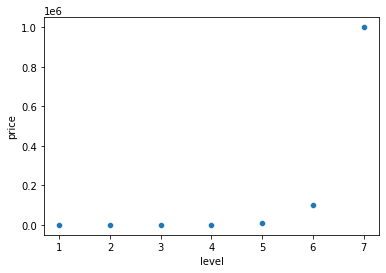

In [109]:
sns.scatterplot(x='level', y='price', data=price_df)

<AxesSubplot:xlabel='level', ylabel='price'>

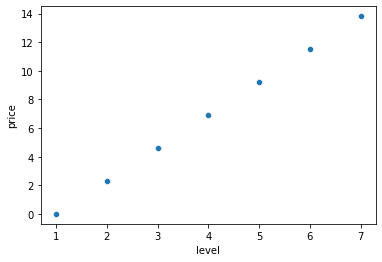

In [111]:
sns.scatterplot(x=price_df['level'], y=np.log(price_df['price']))

In [112]:
np.log(55)

4.007333185232471

In [113]:
np.exp(4.007333185232471)

55.000000000000014

In [114]:
#(2) one hot encoding

salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [115]:
pd.get_dummies(salary_df, columns=['Gender'])

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Gender_Female,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,0,1
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,1,0
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,0,1
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,1,0
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,1,0
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,0,1
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,1,0
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,0,1


In [116]:
pd.get_dummies(salary_df, columns=['Gender'], drop_first=True)

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,1
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,0
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,1
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,0
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,1
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,0
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,1
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,0
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,1


In [117]:
pd.get_dummies(salary_df, columns=['Gender', 'Country', 'Race'], drop_first=True)

,Age,Education Level,Job Title,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,...,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,1,Software Engineer,5.0,90000,0,132.00,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28.0,2,Data Analyst,3.0,65000,0,307.48,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,45.0,3,Manager,15.0,150000,1,158.70,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,36.0,1,Sales Associate,7.0,60000,0,307.48,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,52.0,2,Director,20.0,200000,0,307.48,1,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,0,132.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6680,32.0,0,Sales Associate,3.0,50000,0,135.30,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6681,30.0,1,Financial Manager,4.0,55000,0,100.00,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6682,46.0,2,Marketing Manager,14.0,140000,0,100.00,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [118]:
#고유값이 많으면 컬럼의 갯수를 조정해 줄 필요가 있다
#카테고리에서 고유값이 얼마나 있는가
salary_df[['Gender', 'Country', 'Race', 'Job Title']].nunique()

Gender         2
Country        5
Race          10
Job Title    129
dtype: int64

In [119]:
salary_df['Job Title'].value_counts()

#case가 1면 예측에 도움이 되지 않는다 > drop / outers

Software Engineer                 808
Data Scientist                    515
Data Analyst                      389
Software Engineer Manager         374
Product Manager                   323
                                 ... 
Director of Sales                   1
UX Researcher                       1
Director of Product Management      1
Consultant                          1
Human Resources Director            1
Name: Job Title, Length: 129, dtype: int64

In [121]:
salary_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Manager', 'Sales Associate',
       'Director', 'Marketing Analyst', 'Product Manager',
       'Sales Manager', 'Marketing Coordinator', 'Scientist',
       'Software Developer', 'HR Manager', 'Financial Analyst',
       'Project Manager', 'Customer Service Rep', 'Operations Manager',
       'Marketing Manager', 'Engineer', 'Data Entry Clerk',
       'Sales Director', 'Business Analyst', 'VP of Operations',
       'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Developer',
       'Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
       'Director of Marketing', 'Help Des

In [122]:
job=pd.read_csv('/aiffel/data/job.csv')

In [ ]:
salary_df=salary_df.merge(job, on='Job Title', how='left')

In [ ]:
salary_df.drop('Job Title', axis=1, inplace=True)

In [130]:
salary_df

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director
...,...,...,...,...,...,...,...,...,...,...
6669,49.0,Female,3,20.0,200000,UK,Mixed,0,132.00,Marketing
6670,32.0,Male,0,3.0,50000,Australia,Australian,0,135.30,Sales
6671,30.0,Female,1,4.0,55000,China,Chinese,0,100.00,Financial
6672,46.0,Male,2,14.0,140000,China,Korean,0,100.00,Marketing


In [132]:
salary_df['Jobs'].nunique()

60

In [133]:
salary_df['Jobs'].value_counts()

Software                        2156
Marketing                        999
Data Scientist                   572
Sales                            453
HR                               420
Data Analyst                     389
Product Manager                  325
Project Engineer                 316
Financial                        200
Research                         195
Operations                       147
Web Developer                    129
Product Designer                  80
Receptionist                      57
Project Manager                   36
Business Analyst                  23
Graphic Designer                  23
Social Media                      18
Customer Service                  11
Business Development               7
UX                                 6
Accountant                         6
Business Development Manager       5
Account                            5
Delivery Driver                    5
Project Coordinator                4
Scientist                          4
R

In [136]:
salary_df=pd.get_dummies(salary_df, columns=['Gender', 'Country', 'Race', 'Jobs'], drop_first=True)

In [137]:
#2.4. 스케일링 (Scaling)

salary_df['Age'].mean()

33.61282589151933

In [138]:
salary_df['Age'].std()

7.594369005848066

In [139]:
#(1) Standard Scaling
(salary_df['Age']-salary_df['Age'].mean()) / salary_df['Age'].std()

0      -0.212371
1      -0.739077
2       1.499423
3       0.314335
4       2.421159
          ...   
6669    2.026129
6670   -0.212371
6671   -0.475724
6672    1.631100
6673   -1.002430
Name: Age, Length: 6674, dtype: float64

In [141]:
#(2) Robust Scaling
(salary_df['Age']-salary_df['Age'].quantile(0.5))/(salary_df['Age'].quantile(0.75)/salary_df['Age'].quantile(0.25))

0        0.000000
1       -2.947368
2        9.578947
3        2.947368
4       14.736842
          ...    
6669    12.526316
6670     0.000000
6671    -1.473684
6672    10.315789
6673    -4.421053
Name: Age, Length: 6674, dtype: float64

In [143]:
#(3) Min-Max Scaling
(salary_df['Age']-salary_df['Age'].min()) / (salary_df['Age'].max() - salary_df['Age'].min())

0       0.268293
1       0.170732
2       0.585366
3       0.365854
4       0.756098
          ...   
6669    0.682927
6670    0.268293
6671    0.219512
6672    0.609756
6673    0.121951
Name: Age, Length: 6674, dtype: float64

In [147]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [166]:
ss=StandardScaler()
rs=RobustScaler()
mm =MinMaxScaler()

In [150]:
#(1)
ss.fit(salary_df) #학습하기

StandardScaler()

In [151]:
ss.transform(salary_df) #연산하기

array([[-0.2123872 , -0.70663318, -0.51025684, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-0.7391327 ,  0.42922179, -0.84197037, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.49953568,  1.56507675,  1.14831086, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       ...,
       [-0.47575995, -0.70663318, -0.6761136 , ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.63122206,  0.42922179,  0.98245409, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-1.00250545, -1.84248814, -1.17368391, ..., -0.029997  ,
        -0.01224164, -0.14039125]])

In [156]:
ss_df=pd.DataFrame(ss.transform(salary_df), columns=salary_df.columns)

In [157]:
#(2)
rs.fit(salary_df)

RobustScaler()

In [158]:
rs.transform(salary_df)

array([[ 0.        ,  0.        , -0.22222222, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       ,  1.        , -0.44444444, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.3       ,  2.        ,  0.88888889, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.2       ,  0.        , -0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.4       ,  1.        ,  0.77777778, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       , -1.        , -0.66666667, ...,  0.        ,
         0.        ,  0.        ]])

In [159]:
rs_df=pd.DataFrame(rs.transform(salary_df), columns=salary_df.columns)

In [167]:
#(3)
mm_df= mm.fit_transform(salary_df)

In [168]:
mm_df=pd.DataFrame(mm.transform(salary_df), columns=salary_df.columns)

In [170]:
ss_df.head()

#0, 1로 구성되더라도 비율에 따라 표준편차가 달라지기 때문에 원핫인코딩을 해도 값이 다르다

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,-0.212387,-0.706633,-0.510257,-0.478921,-0.408641,-0.480155,0.905822,-0.496767,-0.500281,2.004506,...,-0.052003,1.447601,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
1,-0.739133,0.429222,-0.841970,-0.952268,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
2,1.499536,1.565077,1.148311,0.657112,2.447137,-0.115582,0.905822,2.013016,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
3,0.314358,-0.706633,-0.178543,-1.046938,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
4,2.421340,0.429222,1.977595,1.603806,-0.408641,1.915926,0.905822,-0.496767,-0.500281,-0.498876,...,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391


In [171]:
rs_df.head()

#원핫인코딛 부분이 -1, 0, 1로 이루어짐

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.0,0.0,-0.222222,-0.277778,0.0,-0.123596,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.4,1.0,-0.444444,-0.555556,0.0,6.448689,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.3,2.0,0.888889,0.388889,1.0,0.876404,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.0,0.000000,-0.611111,0.0,6.448689,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.444444,0.944444,0.0,6.448689,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
mm_df.head()

#음수, 1보다 큰 값이 없음 0~1 값만 존재한다

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.268293,0.333333,0.147059,0.359103,0.0,0.154232,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170732,0.666667,0.088235,0.258963,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.585366,1.000000,0.441176,0.599439,1.0,0.282919,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.365854,0.333333,0.205882,0.238935,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.756098,0.666667,0.588235,0.799720,0.0,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
salary_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,28.0,2,3.0,65000,0,307.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,3,15.0,150000,1,158.70,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,1,7.0,60000,0,307.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,2,20.0,200000,0,307.48,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
#통계적 특성

ss_df.describe()

#mean: 0에 근접하다
#std: 1에 매우 근접하다
#min, max 값이 정해져 있지 않고 컬럼의 특성에 따라 다양

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6.674000e+03,6.674000e+03,6674.000000,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,...,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03
mean,3.406858e-17,1.277572e-16,0.000000,1.022057e-16,1.022057e-16,-2.571113e-16,-1.192400e-16,-7.186340e-17,-3.619786e-17,-6.427782e-17,...,3.406858e-17,-3.406858e-17,-2.129286e-18,-1.064643e-18,4.258572e-18,-2.129286e-18,-2.129286e-18,-4.258572e-18,-2.129286e-18,-4.258572e-17
std,1.000075e+00,1.000075e+00,1.000075,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,...,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00
min,-1.660937e+00,-1.842488e+00,-1.339541,-2.176344e+00,-4.086407e-01,-9.170975e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
25%,-7.391327e-01,-7.066332e-01,-0.841970,-8.575989e-01,-4.086407e-01,-4.801554e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
50%,-2.123872e-01,-7.066332e-01,-0.178543,-5.574179e-03,-4.086407e-01,-4.350957e-01,9.058216e-01,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
75%,5.777311e-01,4.292218e-01,0.650741,8.464505e-01,-4.086407e-01,-1.155818e-01,9.058216e-01,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,1.447601e+00,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
max,3.738204e+00,1.565077e+00,4.299589,2.550500e+00,2.447137e+00,1.915926e+00,9.058216e-01,2.013016e+00,1.998877e+00,2.004506e+00,...,1.922961e+01,1.447601e+00,8.168843e+01,8.168843e+01,4.715577e+01,8.168843e+01,5.775812e+01,3.333667e+01,8.168843e+01,7.122951e+00


In [175]:
rs_df.describe()

#평균: 0에 가까워 지지만 0이 되지는 않는다
#std: 0에 가까워지지만 0이 되지는 않는다
#min, max: 값이 정해져 있지 않고 다양하다

#모든 컬럼의 스케일이 크게 다르지 않다

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,...,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000
mean,0.161283,0.622116,0.119610,0.003271,0.143093,1.193437,-0.450704,0.197932,0.200180,0.199281,...,0.002697,0.323045,0.000150,0.000150,0.000450,0.000150,0.00030,0.000899,0.000150,0.019329
std,0.759437,0.880460,0.669972,0.586881,0.350193,2.743136,0.497601,0.398471,0.400165,0.399490,...,0.051867,0.467675,0.012241,0.012241,0.021198,0.012241,0.01731,0.029972,0.012241,0.137688
min,-1.100000,-1.000000,-0.777778,-1.273889,0.000000,-1.322097,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-0.400000,0.000000,-0.444444,-0.500000,0.000000,-0.123596,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.555556,0.500000,0.000000,0.876404,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,3.000000,2.000000,3.000000,1.500000,1.000000,6.448689,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [176]:
mm_df.describe()

#평균: 0~1
#표준편차: 0~1
#min, max: 0, 1

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,...,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000
mean,0.307630,0.540705,0.237544,0.460422,0.143093,0.323717,0.549296,0.197932,0.200180,0.199281,...,0.002697,0.323045,0.000150,0.000150,0.000450,0.000150,0.00030,0.000899,0.000150,0.019329
std,0.185229,0.293487,0.177346,0.211574,0.350193,0.353006,0.497601,0.398471,0.400165,0.399490,...,0.051867,0.467675,0.012241,0.012241,0.021198,0.012241,0.01731,0.029972,0.012241,0.137688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.170732,0.333333,0.088235,0.278991,0.000000,0.154232,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.268293,0.333333,0.205882,0.459243,0.000000,0.170137,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.414634,0.666667,0.352941,0.639495,0.000000,0.282919,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [177]:
#ss: 아웃라이어가 없는 데이터에 적합 . 데이터가 정규분포를 가지면 적합
#rs: 아웃라이어가 많은 데이터에 적합 . 정규 분포를 따르지 않는 데이터에 적합
#mm: 스케일링한 데이터의 범위를 제한하고 싶을때 적합 (ex. 딥러닝)

In [178]:
#2.5. 주성분 분석 (PCA)

from sklearn.decomposition import PCA

In [181]:
pca=PCA()

In [182]:
pca.fit(salary_df)

PCA()

In [183]:
pd.DataFrame(pca.transform(salary_df)) #동일한 변수 갯수만큼 주성분이 나온다 > 79개

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-25294.401449,-35.927515,0.421192,1.180524,0.539384,-0.180507,0.681376,0.184226,1.002788,-0.353779,...,-0.000454,-0.000172,0.001163,0.000857,0.000820,-0.000196,0.002147,0.002123,-0.000175,7.725889e-14
1,-50294.407066,138.806380,-0.333187,0.224362,-0.958083,-0.241859,-0.241186,-0.383320,-0.143392,-0.010515,...,-0.000087,0.000091,-0.001037,-0.000251,-0.000776,0.000201,0.001553,0.001013,0.001235,1.500957e-13
2,34705.599441,-7.432077,8.552416,1.092177,-0.704550,-0.298237,0.195463,1.195063,-0.003915,-0.012052,...,0.000301,0.000116,0.000623,-0.000513,-0.000525,0.001282,0.001402,0.000892,-0.027603,-1.067883e-13
3,-55294.405818,138.644191,9.233644,1.028194,0.255635,-0.216322,-0.515753,-0.434514,-0.106573,0.012223,...,-0.000118,0.000059,-0.000689,0.000207,-0.000112,0.000632,0.000912,-0.000132,0.001361,1.650837e-13
4,84705.595635,142.853086,10.357471,1.719041,0.880828,0.481965,-0.161033,-0.207667,-0.462547,-0.233319,...,0.044788,-0.292259,-0.162288,-0.371234,0.197064,-0.248065,0.290574,0.118531,-0.076433,-2.675182e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,84705.600608,-32.627228,7.654235,0.031748,-0.428730,0.296013,-0.823992,-0.544413,0.631546,-0.487361,...,-0.000603,0.000485,-0.001367,0.001040,0.001213,-0.001089,-0.001095,-0.001398,0.001801,-2.561897e-13
6670,-65294.401335,-33.835290,4.861691,1.979699,1.185291,0.089906,-0.103538,0.063824,-0.378510,-0.455633,...,-0.001030,-0.001251,0.000999,0.000386,-0.000112,-0.000358,-0.000158,-0.000364,-0.000072,1.984883e-13
6671,-60294.400430,-68.984421,3.005404,0.147405,-0.009182,-0.480902,-0.366391,-0.660713,-0.521658,0.279341,...,0.000066,0.000203,-0.000362,-0.000336,-0.000682,0.000114,0.001197,0.001059,-0.000472,1.837779e-13
6672,24705.601309,-66.436829,10.132645,2.191822,0.216634,-0.434056,-0.145218,-0.433333,-0.897425,-0.204442,...,0.000368,-0.000616,0.001235,-0.000035,-0.000516,0.000076,-0.000504,-0.000243,0.000470,-7.359960e-14


In [193]:
pca=PCA(2) #주성분 2개만 도출

In [194]:
pd.DataFrame(pca.fit_transform(salary_df), columns=['PC1', 'PC2'])

,PC1,PC2
0,-25294.401449,-35.927515
1,-50294.407066,138.806380
2,34705.599441,-7.432077
3,-55294.405818,138.644191
4,84705.595635,142.853086
...,...,...
6669,84705.600608,-32.627228
6670,-65294.401335,-33.835290
6671,-60294.400430,-68.984421
6672,24705.601309,-66.436829


In [196]:
(pca.explained_variance_ratio_).sum() #얼마나 설명하고 있는가

0.9999999848414092

In [ ]:
#주성분분석 > 데이터의 개수를 줄이기 위해
#사용
    #1. 데이터 시각화를 위해 > 데이터의 수를 줄여 더 효율적으로 표현
    #2. 다중공선성 줄임
#단점
    #주성분으로 선택된 변수는 복합하여 도출되어 변수의 특성이 무엇인지 설명하기 어렵다
    #(x, y)축이 무엇인지 설명할 수 없다

In [198]:
salary_df.corr()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
Age,1.000000,0.597131,0.938002,0.729071,0.333341,-0.027109,0.118189,0.005074,0.017223,0.011160,...,-0.044524,0.002858,0.026417,0.015133,0.006666,-0.010660,0.013423,0.013380,-0.007436,-0.068369
Education Level,0.597131,1.000000,0.612996,0.645249,0.274061,-0.016302,0.022686,0.001361,0.002490,0.022404,...,-0.036747,-0.034312,-0.008650,-0.008650,-0.014985,-0.008650,-0.002401,0.029911,-0.008650,-0.062120
Years of Experience,0.938002,0.612996,1.000000,0.811046,0.317443,-0.022393,0.099047,0.005579,0.013838,0.013330,...,-0.041389,0.000430,0.028270,0.020148,-0.001441,-0.012337,0.011267,0.005838,-0.010307,-0.102502
Salary,0.729071,0.645249,0.811046,1.000000,0.223751,-0.021693,0.127268,0.010821,0.008797,0.006277,...,-0.058547,0.047428,0.003408,-0.002386,-0.018187,-0.016293,-0.010750,-0.003480,-0.016293,-0.147764
Senior,0.333341,0.274061,0.317443,0.223751,1.000000,-0.020193,0.039063,0.012860,0.014788,-0.001407,...,-0.021251,-0.059025,-0.005002,-0.005002,0.011521,-0.005002,0.017647,0.030574,-0.005002,-0.057370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jobs_Technical Writer,-0.010660,-0.008650,-0.012337,-0.016293,-0.005002,-0.005326,0.011089,-0.006081,-0.006124,-0.006107,...,-0.000637,-0.008457,-0.000150,-0.000150,-0.000260,1.000000,-0.000212,-0.000367,-0.000150,-0.001719
Jobs_Training Specialist,0.013423,-0.002401,0.011267,-0.010750,0.017647,0.015585,-0.019114,0.013126,-0.008662,-0.008637,...,-0.000900,-0.011960,-0.000212,-0.000212,-0.000367,-0.000212,1.000000,-0.000519,-0.000212,-0.002431
Jobs_UX,0.013380,0.029911,0.005838,-0.003480,0.030574,0.011603,-0.033116,-0.002354,-0.015007,0.010067,...,-0.001560,-0.020722,-0.000367,-0.000367,-0.000636,-0.000367,-0.000519,1.000000,-0.000367,-0.004211
Jobs_Web Designer,-0.007436,-0.008650,-0.010307,-0.016293,-0.005002,-0.011227,0.011089,-0.006081,0.024470,-0.006107,...,-0.000637,-0.008457,-0.000150,-0.000150,-0.000260,-0.000150,-0.000212,-0.000367,1.000000,-0.001719
